# 감귤 착과량 예측하기

##### 데이터 칼럼 
감귤나무의 나무 생육 상태, 엽록소 및 새순 정보

##### 폴더 구조

##### 외부 라이브러리 설치

In [4]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install torch 
%pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


##### 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os


데이터 불러오기 

In [7]:
df = pd.read_csv('./data/train.csv')
df.head()



,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [10]:
print(df)
df.shape
df.columns

              ID  착과량(int)  수고(m)  수관폭1(min)  수관폭2(max)  수관폭평균  2022-09-01 새순  \
0     TRAIN_0000       692  275.0      287.0      292.0  289.5            2.8   
1     TRAIN_0001       534  293.0      284.0      336.0  310.0            3.3   
2     TRAIN_0002       634  300.0      392.0      450.0  421.0            3.0   
3     TRAIN_0003       639  289.0      368.0      379.0  373.5            3.1   
4     TRAIN_0004       496  306.0      353.0      358.0  355.5            3.7   
...          ...       ...    ...        ...        ...    ...            ...   
2202  TRAIN_2202       119  230.0      353.0      367.0  360.0            4.7   
2203  TRAIN_2203       611  266.0      337.0      400.0  368.5            3.1   
2204  TRAIN_2204       650  237.0      353.0      362.0  357.5            3.0   
2205  TRAIN_2205       363  281.0      337.0      403.0  370.0            3.9   
2206  TRAIN_2206        17  228.0      389.0      398.0  393.5            5.3   

      2022-09-02 새순  2022-0

Index(['ID', '착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균',
       '2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순',
       ...
       '2022-11-19 엽록소', '2022-11-20 엽록소', '2022-11-21 엽록소', '2022-11-22 엽록소',
       '2022-11-23 엽록소', '2022-11-24 엽록소', '2022-11-25 엽록소', '2022-11-26 엽록소',
       '2022-11-27 엽록소', '2022-11-28 엽록소'],
      dtype='object', length=184)

탐색적 분석
 - pyplot
 - histo
 - heatmap 
일반 성분이랑 날짜별 칼럼 따로 분류해야할 필요성이 있어보인다.  

In [33]:
df1 = df.loc[:, '착과량(int)':'수관폭평균']
print(df1)
df2 = df.loc[:, '2022-09-01 새순':'2022-11-28 새순']
print(df2)
df3 = df.loc[:, '2022-09-01 엽록소':'2022-11-28 엽록소']
print(df3)


      착과량(int)  수고(m)  수관폭1(min)  수관폭2(max)  수관폭평균
0          692  275.0      287.0      292.0  289.5
1          534  293.0      284.0      336.0  310.0
2          634  300.0      392.0      450.0  421.0
3          639  289.0      368.0      379.0  373.5
4          496  306.0      353.0      358.0  355.5
...        ...    ...        ...        ...    ...
2202       119  230.0      353.0      367.0  360.0
2203       611  266.0      337.0      400.0  368.5
2204       650  237.0      353.0      362.0  357.5
2205       363  281.0      337.0      403.0  370.0
2206        17  228.0      389.0      398.0  393.5

[2207 rows x 5 columns]
      2022-09-01 새순  2022-09-02 새순  2022-09-03 새순  2022-09-04 새순  \
0               2.8            2.8            2.7            2.7   
1               3.3            3.3            3.3            3.2   
2               3.0            2.9            2.9            2.9   
3               3.1            3.0            3.0            3.0   
4               3.7    

In [31]:
df.describe
df1.describe
df1.shape

(2207, 6)

In [34]:
df1.corr()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균
착과량(int),1.000000,0.007002,0.021279,0.037168,0.030611
수고(m),0.007002,1.000000,0.456394,0.484295,0.490456
수관폭1(min),0.021279,0.456394,1.000000,0.841330,0.957948
수관폭2(max),0.037168,0.484295,0.841330,1.000000,0.961049
수관폭평균,0.030611,0.490456,0.957948,0.961049,1.000000


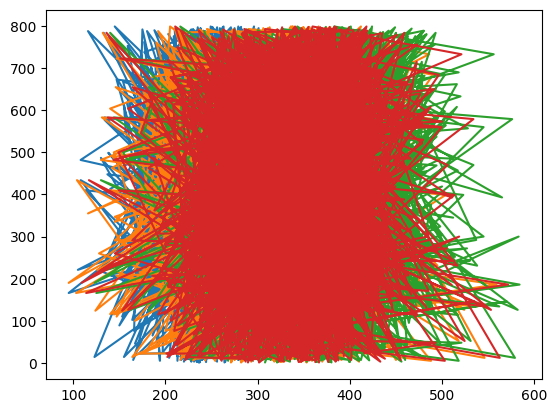

In [42]:
y_df1 = df1.loc[:,'착과량(int)']
x_df1 = df1.loc[:,'수고(m)':'수관폭평균']
plt.plot(x_df1, y_df1)
plt.show()



C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current f

C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python3

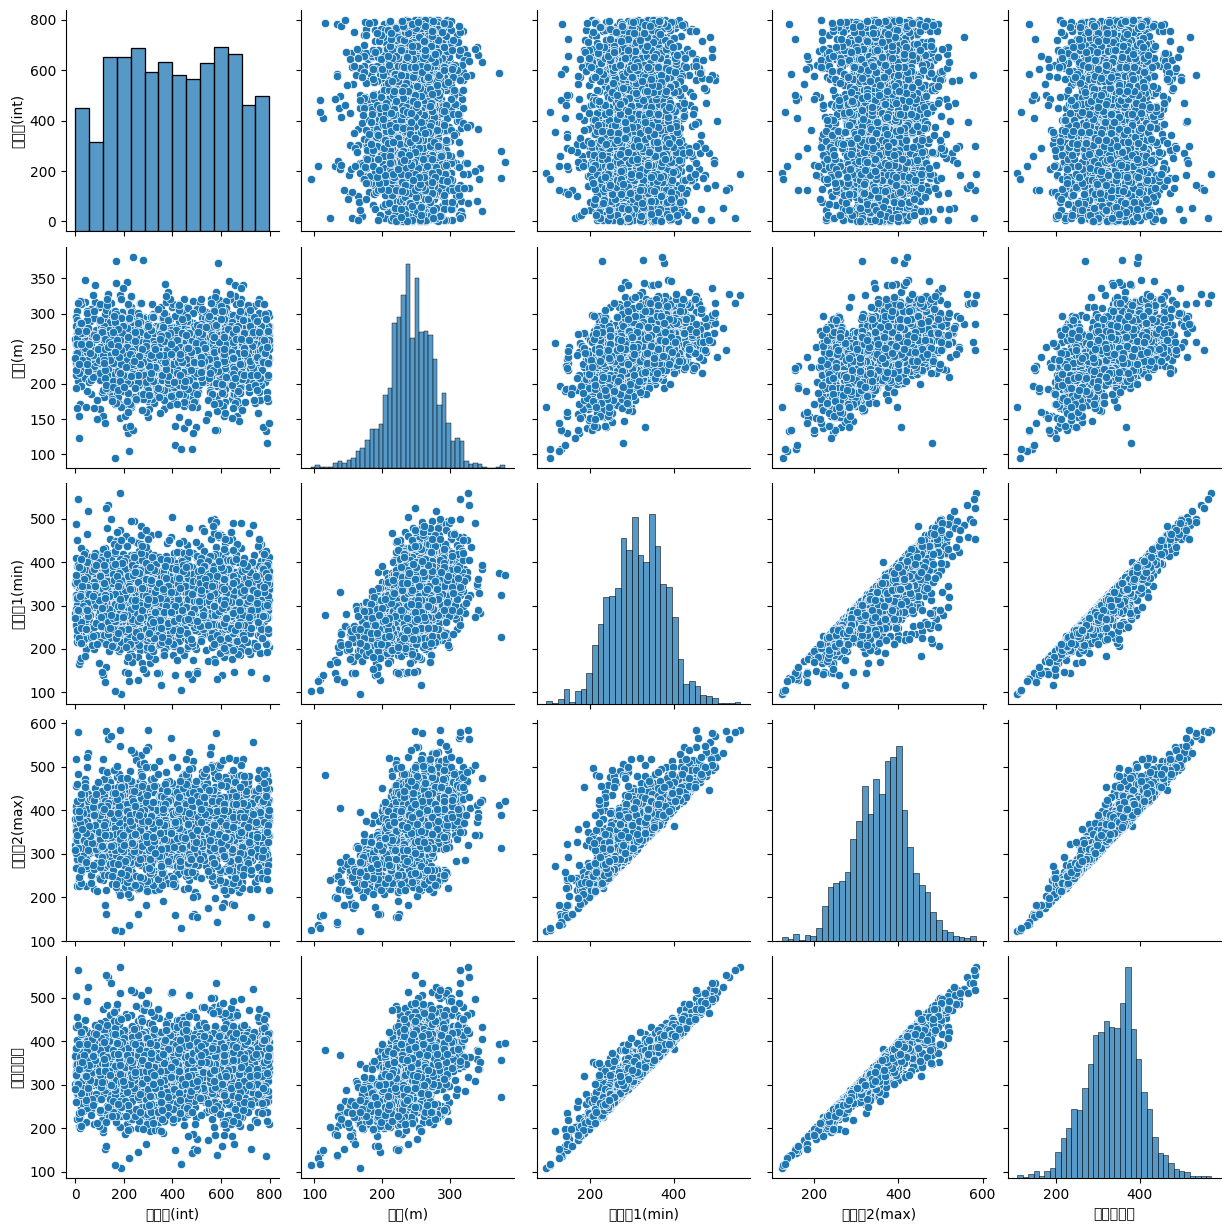

In [43]:
sns.pairplot(df1)

<Axes: ylabel='Count'>

C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\trixy\AppData\Roaming\Python\Python3

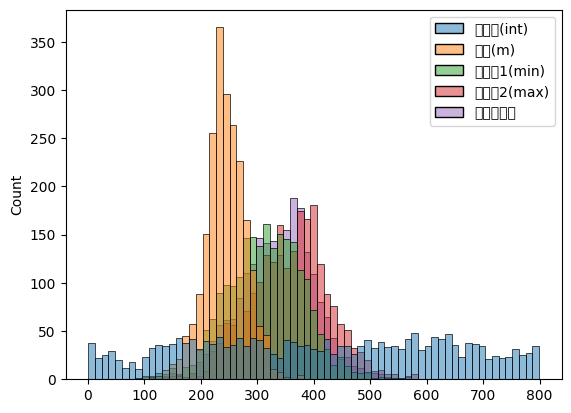

In [45]:
sns.histplot(df1)

찾아낼 수 있는 유의미한 데이터가 없다. 그러면 새순, 엽록소로부터 알아내는 것도 나쁘지 않은 것 같다. 

새순을 행으로 바꾸고, 착과량은 열로 그냥 그대로 두도록 DataFrame 구성해보기 

In [68]:
print(df1)
df1 = pd.DataFrame()



0     2022-09-01 새순  0  0    2.8
      2022-09-02 새순  0  0    2.8
      2022-09-03 새순  0  0    2.7
      2022-09-04 새순  0  0    2.7
      2022-09-05 새순  0  0    2.7
                            ... 
2202  착과량(int)       0  0    119
2203  착과량(int)       0  0    611
2204  착과량(int)       0  0    650
2205  착과량(int)       0  0    363
2206  착과량(int)       0  0     17
Length: 198630, dtype: object


AttributeError: 'Series' object has no attribute 'DataFrame'

In [66]:
# 열 행 바꾸기 
#df = df[:, '2022-09-01':].to_frame().stack()
#print(df)
#df1 = df.filter(like='새순')
#print(df1)
#df1 = df1.append(df.filter(like='착과량'))
#print(df1)
#df1 = pd.DataFrame({'col'})
#df1 = df1.rename(columns ={'':'x', '착과량(int)':'y'} )


